In [102]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [103]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [104]:
def build_model(activation_first, activation_second):
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_first), 
        layers.Dense(64, activation=activation_second),   
        layers.Dense(10)                      
    ])

In [105]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(pad=5.0)

    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])

    ax[1].plot(history.history['loss'], label='accuracy')
    ax[1].plot(history.history['val_loss'], label='val_accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].set_ylim([0, 1])

    plt.show()

In [106]:
def test_model(model, name):
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    print(f'\nTesting: {name}')
    early_stopping = EarlyStopping(patience = 3)
    history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=early_stopping, verbose=False)
    
    print(f'\nConverged in {len(history.history["accuracy"])} epochs')
    reached_90 = next((i + 1 for i, e in enumerate(history.history["val_accuracy"]) if e >= 0.9), np.inf) 

    if reached_90 == np.inf:
        print('\nNever reached 90% accuracy')
    else:
        print(f'\nReached 90% accuracy in {reached_90} epochs')

    
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc}, Test loss: {test_loss}')

    plot_history(history)
    print('\n\n\n')

    return (history, model)

In [107]:
activation_functions = ['relu', 'sigmoid', 'softmax', 'tanh']
models = dict(map(lambda p: (f'{p[0]}, {p[1]}', build_model(p[0], p[1])), 
                  itertools.product(activation_functions, repeat=2)))


Testing: relu, relu

Converged in 12 epochs

Reached 90% accuracy in 1 epochs
313/313 - 0s - loss: 0.1344 - accuracy: 0.9706 - 307ms/epoch - 980us/step

Test accuracy: 0.9706000089645386, Test loss: 0.13438363373279572


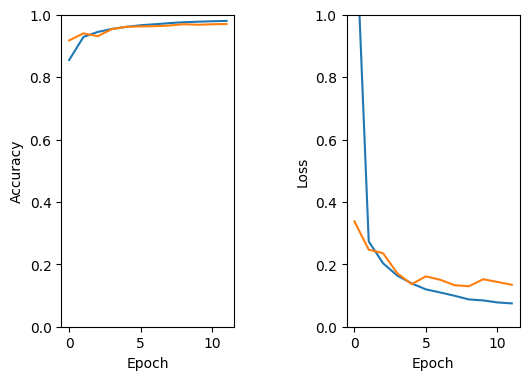






Testing: relu, sigmoid

Converged in 10 epochs

Reached 90% accuracy in 1 epochs
313/313 - 0s - loss: 0.2308 - accuracy: 0.9329 - 315ms/epoch - 1ms/step

Test accuracy: 0.9329000115394592, Test loss: 0.23080746829509735


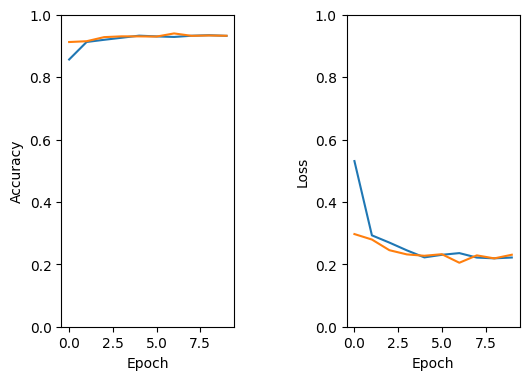






Testing: relu, softmax

Converged in 16 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 1.1644 - accuracy: 0.4756 - 313ms/epoch - 1ms/step

Test accuracy: 0.475600004196167, Test loss: 1.1644102334976196


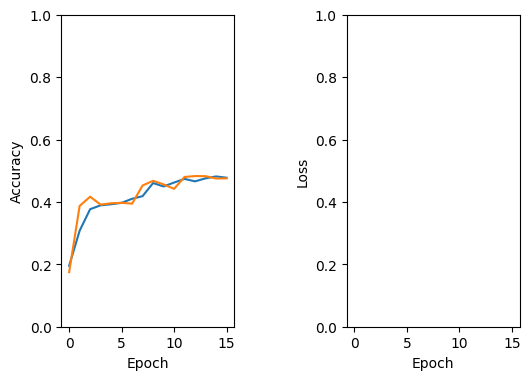






Testing: relu, tanh

Converged in 14 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 0.3632 - accuracy: 0.8910 - 299ms/epoch - 955us/step

Test accuracy: 0.890999972820282, Test loss: 0.36321786046028137


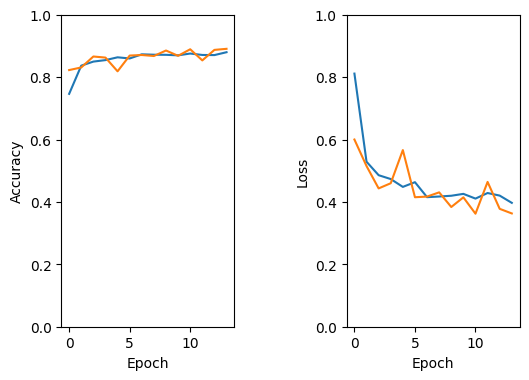






Testing: sigmoid, relu

Converged in 29 epochs

Reached 90% accuracy in 2 epochs
313/313 - 0s - loss: 0.1660 - accuracy: 0.9478 - 342ms/epoch - 1ms/step

Test accuracy: 0.9477999806404114, Test loss: 0.16601774096488953


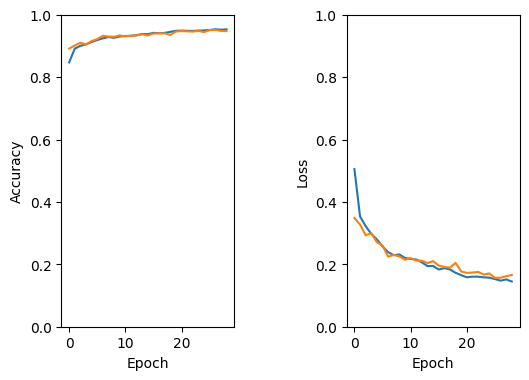






Testing: sigmoid, sigmoid

Converged in 17 epochs

Reached 90% accuracy in 2 epochs
313/313 - 0s - loss: 0.1932 - accuracy: 0.9418 - 303ms/epoch - 968us/step

Test accuracy: 0.9417999982833862, Test loss: 0.1931888312101364


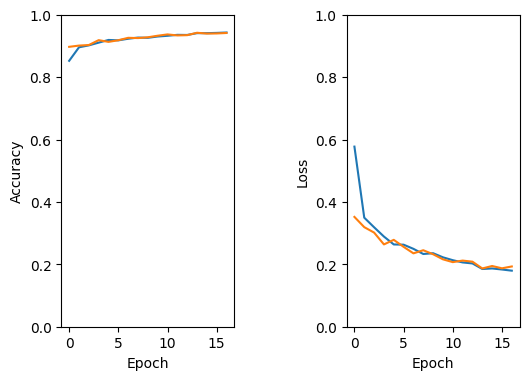






Testing: sigmoid, softmax

Converged in 27 epochs

Reached 90% accuracy in 23 epochs
313/313 - 0s - loss: 0.4105 - accuracy: 0.9059 - 322ms/epoch - 1ms/step

Test accuracy: 0.9059000015258789, Test loss: 0.4105318486690521


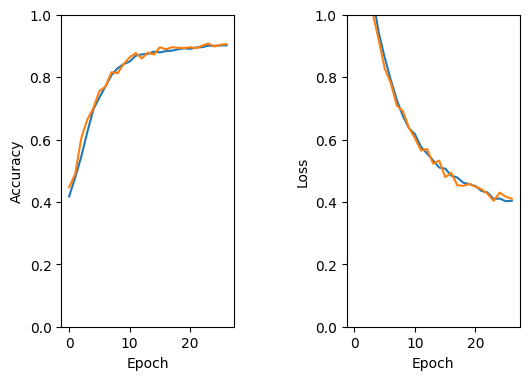






Testing: sigmoid, tanh

Converged in 14 epochs

Reached 90% accuracy in 3 epochs
313/313 - 0s - loss: 0.1992 - accuracy: 0.9381 - 314ms/epoch - 1ms/step

Test accuracy: 0.9380999803543091, Test loss: 0.19924628734588623


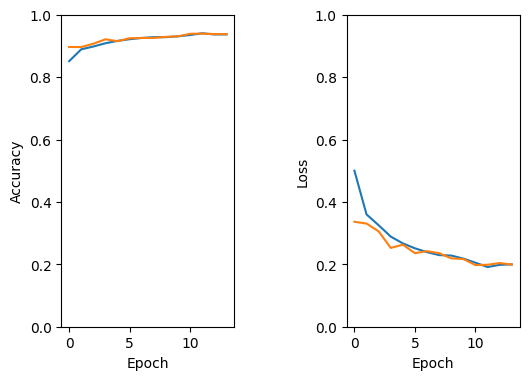






Testing: softmax, relu

Converged in 18 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 0.6819 - accuracy: 0.8161 - 315ms/epoch - 1ms/step

Test accuracy: 0.816100001335144, Test loss: 0.6819152235984802


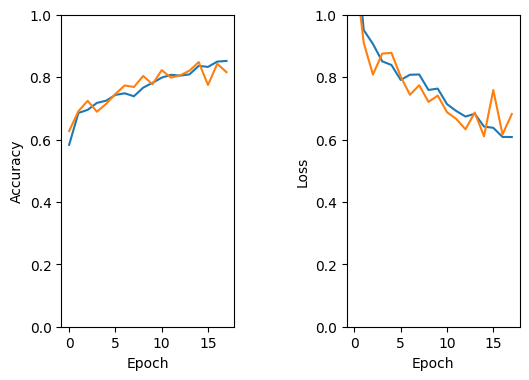






Testing: softmax, sigmoid

Converged in 10 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 0.9284 - accuracy: 0.6588 - 315ms/epoch - 1ms/step

Test accuracy: 0.6588000059127808, Test loss: 0.9283687472343445


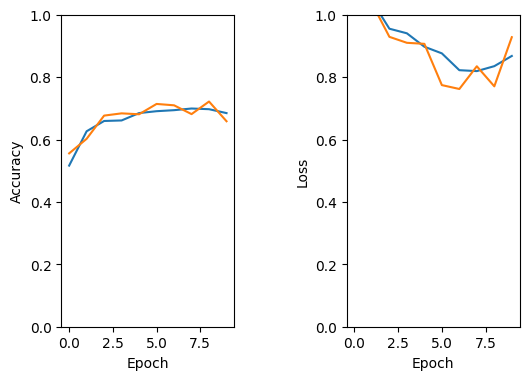






Testing: softmax, softmax

Converged in 7 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 1.1287 - accuracy: 0.5465 - 351ms/epoch - 1ms/step

Test accuracy: 0.546500027179718, Test loss: 1.1286641359329224


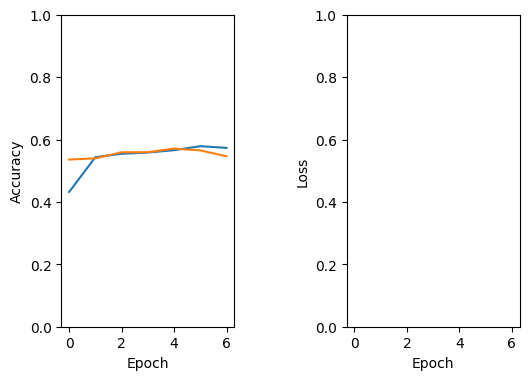






Testing: softmax, tanh

Converged in 28 epochs

Never reached 90% accuracy
313/313 - 0s - loss: 0.5697 - accuracy: 0.8207 - 320ms/epoch - 1ms/step

Test accuracy: 0.8206999897956848, Test loss: 0.5696863532066345


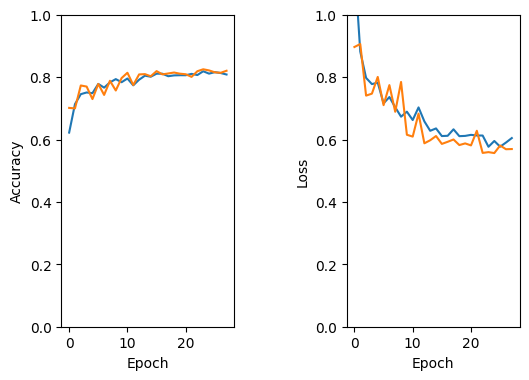






Testing: tanh, relu

Converged in 19 epochs

Reached 90% accuracy in 5 epochs
313/313 - 0s - loss: 0.2064 - accuracy: 0.9339 - 339ms/epoch - 1ms/step

Test accuracy: 0.933899998664856, Test loss: 0.20641757547855377


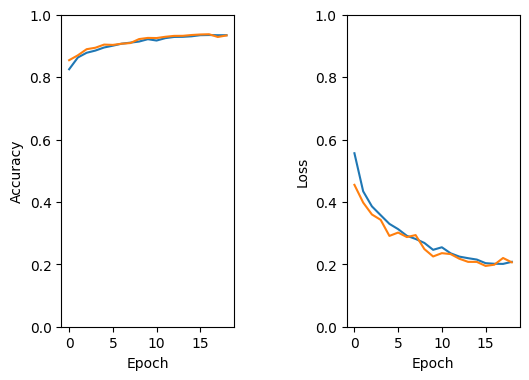






Testing: tanh, sigmoid

Converged in 15 epochs

Reached 90% accuracy in 5 epochs
313/313 - 0s - loss: 0.2167 - accuracy: 0.9315 - 354ms/epoch - 1ms/step

Test accuracy: 0.9315000176429749, Test loss: 0.21665500104427338


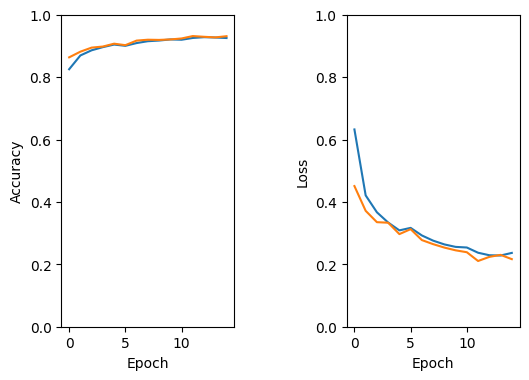






Testing: tanh, softmax

Converged in 31 epochs

Reached 90% accuracy in 20 epochs
313/313 - 0s - loss: 0.2964 - accuracy: 0.9186 - 349ms/epoch - 1ms/step

Test accuracy: 0.9186000227928162, Test loss: 0.2963702976703644


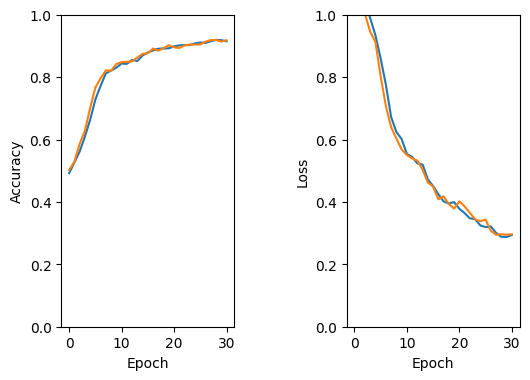






Testing: tanh, tanh

Converged in 19 epochs

Reached 90% accuracy in 5 epochs
313/313 - 0s - loss: 0.2293 - accuracy: 0.9292 - 333ms/epoch - 1ms/step

Test accuracy: 0.9291999936103821, Test loss: 0.2293219268321991


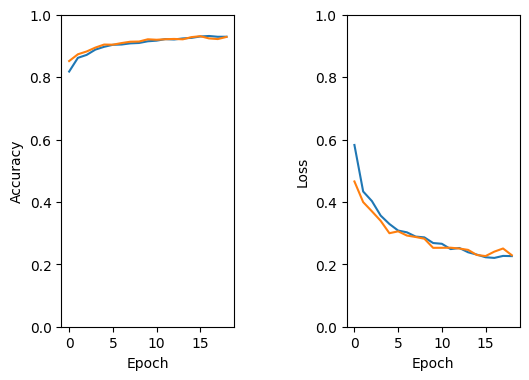

In [108]:
training_results = {}

for (name, model) in models.items():
    training_results[name] = test_model(model, name)

Results: analysis:

ReLU: Acts as it should: converges very fast if set as the first layer, gives the best result in a test, but can be not able to train longer and better due to the fast convergence.

Sigmoid and Tanh: Work good in both positions, tanh acts as better sigmoid providing better data to the next layer (zero-centered), so with it (tanh, relu) converges faster than (sigmoid, relu) and (tanh, softmax) slower than (sigmoid, softmax), but more accurate. 

Softmax: Bad choice for the first layer (works relatively good with relu, that converges pretty much against softmax), but good for the second layer: allows long training.